In [1]:
# Setze eine Simulation auf 
# Nutze src\districtgenerator\data\weather\FZK_DWD-TRY-MiddleYear_DWD.csv als Wetterdaten
# Nutze C:\Users\felix\Programmieren\tecdm\src\districtgenerator\data\scenarios\FZK-Haus.csv als Input 

In [2]:
from districtgenerator import Datahandler

In [3]:
# Set up the environment 
# Change the Envionment File, so it matches the FZK - Weather File 
# Again we have to make changes in a JSON-file. This time it is the file with the name "site-data.json" in the "data/"
# directory of the distictgenerator. Open the file (e.g. with a text editor). We change the location of the district
# from Aachen to Garmisch Patenkirchen in the alps. Both are cities in Germany. The available weather data is restricted
# to sites in Germany. To change the location we set the values of the "location" in the JSON-file to "[47.49, 11.09]",
# the value of the "climateZone" to "15" and the "altitude" to "700". Than save the file.
# Which climate zone belongs to which city is listed in design_weather_data.json in the folder '\data\weather'.
data = Datahandler()


In [4]:
# data = Datahandler()

In [5]:
data.time

{}

In [6]:
#type(data.time["dataLength"])
# type(data.time)

In [7]:
data.generateEnvironment()

In [8]:
data.initializeBuildings(scenario_name="FZK-Haus")

In [9]:
data.generateBuildings()

In [10]:
from districtgenerator import Envelope
import os
import json 

In [11]:
print(data.filePath)

c:\users\felix\programmieren\tecdm\src\districtgenerator\data


In [12]:
site = data.site
site 

{'location': [49.09682143422149, 8.425676149802348],
 'climateZone': 0,
 'altitude': 111.8,
 'timeZone': 1,
 'albedo': 0.2,
 'TRYYear': 'TRY2015',
 'TRYType': 'kalt',
 'SunDirect': array([0., 0., 0., ..., 0., 0., 0.]),
 'SunDiffuse': array([0., 0., 0., ..., 0., 0., 0.]),
 'T_e': array([-0.6, -0.8, -1. , ..., -0.4, -0.5, -0.5]),
 'SunTotal': array([0., 0., 0., ..., 0., 0., 0.])}

In [13]:
with open(os.path.join(data.filePath, 'design_weather_data.json')) \
                as json_file:
            jsonData = json.load(json_file)
            print(jsonData)
            for subData in jsonData:
                # Hier falsches Assignement 
                print(subData["Klimazone"] , print(site["climateZone"]))
                if subData["Klimazone"] == site["climateZone"]:
                    # outside design temperature in °C
                    T_ne = subData["Theta_e"]
                    # outside average temperature in °C
                    T_me = subData["Theta_e_m"]
                    print("It worked")

[{'Klimazone': 0, 'Bezeichnung': 'Default', 'Standort': 'Aachen', 'PLZ': '52072', 'Theta_e': -7.1, 'Theta_e_m': 11.5}, {'Klimazone': 1, 'Bezeichnung': 'NordseekÃ¼ste', 'Standort': 'Bremerhaven', 'PLZ': '27568', 'Theta_e': -8.1, 'Theta_e_m': 10}, {'Klimazone': 2, 'Standort': 'Rostock-WarnemÃ¼nde', 'Bezeichnung': 'OstseekÃ¼ste', 'PLZ': '18119', 'Theta_e': -10.2, 'Theta_e_m': 9.5}, {'Klimazone': 3, 'Standort': 'Hamburg-FuhlsbÃ¼ttel', 'Bezeichnung': 'Nordwestdeutsches Tiefland', 'PLZ': '22339', 'Theta_e': -9.3, 'Theta_e_m': 9.7}, {'Klimazone': 4, 'Standort': 'Potsdam', 'Bezeichnung': 'Nordostdeutsches Tiefland', 'PLZ': '14467', 'Theta_e': -12.1, 'Theta_e_m': 10}, {'Klimazone': 5, 'Standort': 'Essen', 'Bezeichnung': 'Nordrhein-westfÃ¤lische Bucht und Emsland', 'PLZ': '45127', 'Theta_e': -7.1, 'Theta_e_m': 11.6}, {'Klimazone': 6, 'Standort': 'Bad Marienberg', 'Bezeichnung': 'NÃ¶rdliche und westliche Mittelgebiete, Randgebiete', 'PLZ': '56470', 'Theta_e': -10.9, 'Theta_e_m': 8.2}, {'Klimazone

In [14]:
# set number of peoples in building 
data.district[0]['user'].nb_occ[0] = 2


In [15]:
data.generateDemands(calcUserProfiles=True, saveUserProfiles=True)

Calculate demands of building SFH_1_0
Finished generating demands!


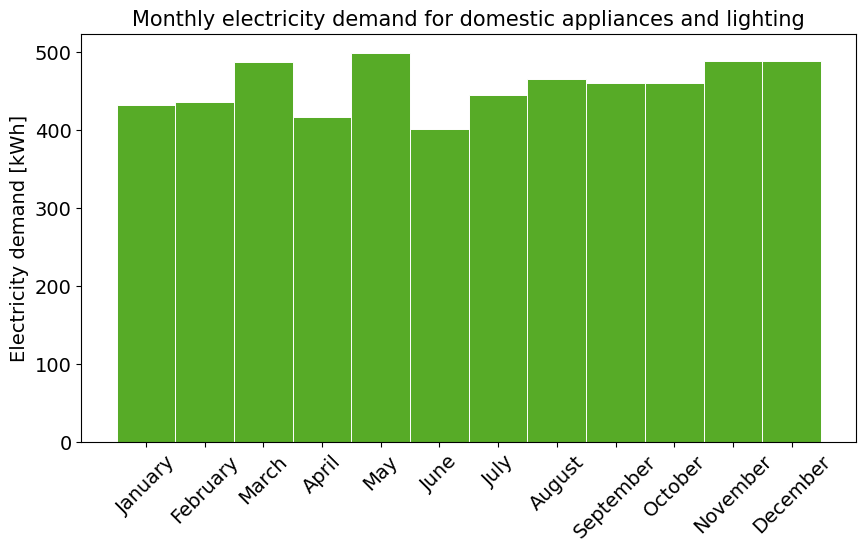

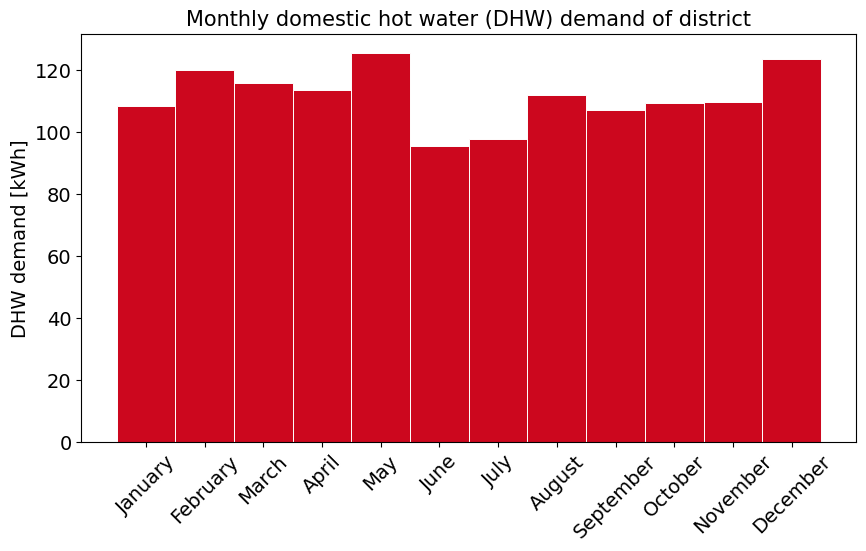

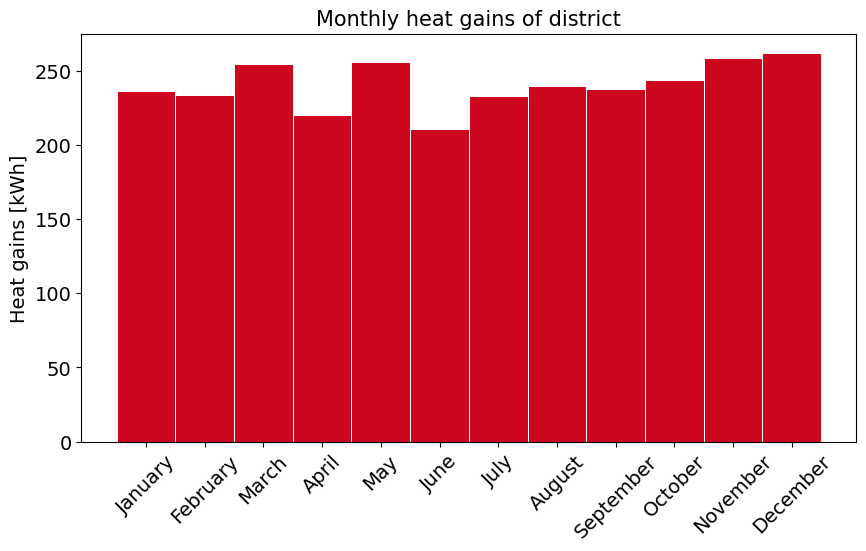

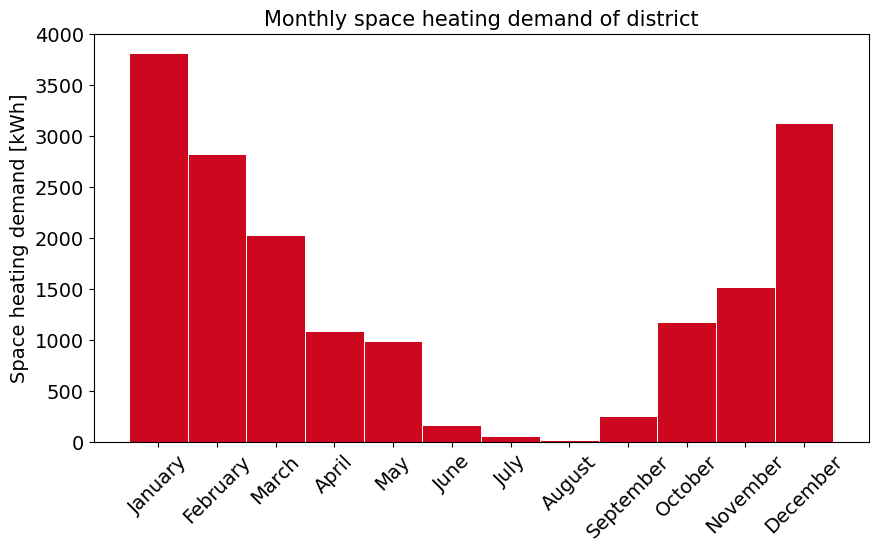

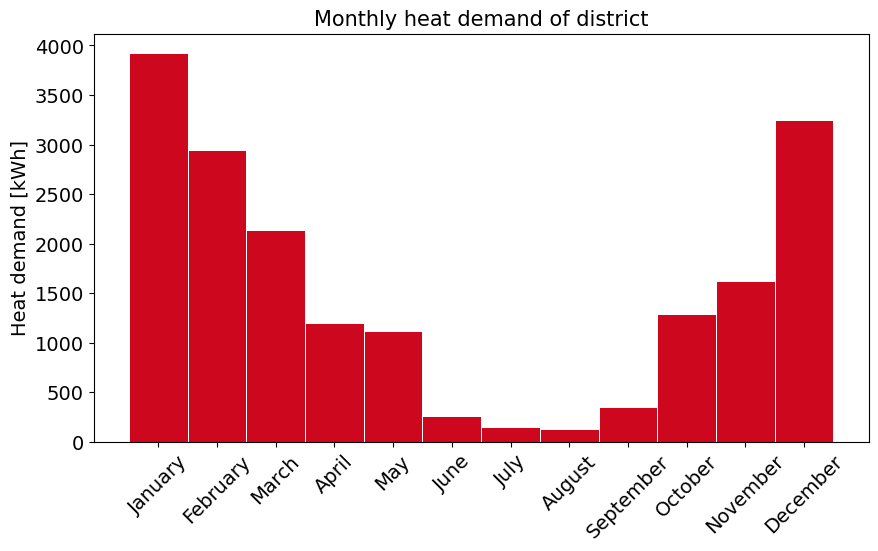

In [16]:
data.plot(timeStamp=True, show=True)

In [17]:
# Compare the results with the Energy ADD 


In [18]:
vars(data)

{'site': {'location': [49.09682143422149, 8.425676149802348],
  'climateZone': 0,
  'altitude': 111.8,
  'timeZone': 1,
  'albedo': 0.2,
  'TRYYear': 'TRY2015',
  'TRYType': 'kalt',
  'SunDirect': array([0., 0., 0., ..., 0., 0., 0.]),
  'SunDiffuse': array([0., 0., 0., ..., 0., 0., 0.]),
  'T_e': array([-0.6, -0.8, -1. , ..., -0.4, -0.5, -0.5]),
  'SunTotal': array([0., 0., 0., ..., 0., 0., 0.])},
 'time': {'timeResolution': 3600,
  'dataResolution': 3600,
  'dataLength': 31536000,
  'timeSteps': 8760},
 'district': [{'buildingFeatures': id              0
   building      SFH
   year         2020
   retrofit        1
   area        240.0
   Name: 0, dtype: object,
   'envelope': <districtgenerator.envelope.Envelope at 0x1ceb0e071c0>,
   'user': <districtgenerator.users.Users at 0x1ceb0f00610>,
   'heatload': 8202.902376542776,
   'bivalent': 8202.902376542776,
   'heatlimit': 8202.902376542776,
   'dhwload': 4662.1,
   'unique_name': 'SFH_1_0'}],
 'scenario_name': 'FZK-Haus',
 'scenari

In [19]:
data.district[0]

{'buildingFeatures': id              0
 building      SFH
 year         2020
 retrofit        1
 area        240.0
 Name: 0, dtype: object,
 'envelope': <districtgenerator.envelope.Envelope at 0x1ceb0e071c0>,
 'user': <districtgenerator.users.Users at 0x1ceb0f00610>,
 'heatload': 8202.902376542776,
 'bivalent': 8202.902376542776,
 'heatlimit': 8202.902376542776,
 'dhwload': 4662.1,
 'unique_name': 'SFH_1_0'}

In [20]:
vars(data.district[0]["envelope"])

{'U': {'window': 1.0908802411837044,
  'opaque': {'roof': 0.11213755540129226,
   'intWall': [],
   'intFloor': [],
   'floor': 0.1493979332138456,
   'wall': 0.14695810489435882,
   'ceiling': []}},
 'd': {'window': array([0.56170909]),
  'opaque': {'roof': array([0.02, 0.3 , 0.02]),
   'intWall': array([0.01, 0.15, 0.01]),
   'intFloor': array([0.04, 0.06, 0.16]),
   'floor': array([0.03, 0.04, 0.22, 0.16]),
   'wall': array([0.24, 0.21, 0.01]),
   'ceiling': array([0.16, 0.06, 0.04])}},
 'd_iso': {'window': [],
  'opaque': {'roof': 0.34,
   'intWall': 0.17,
   'intFloor': 0.26,
   'floor': 0.45000000000000007,
   'wall': 0.45999999999999996,
   'ceiling': 0.26}},
 'rho': {'window': array([0.]),
  'opaque': {'roof': array([ 528. ,   39.5, 1650. ]),
   'intWall': array([1600.,  695., 1600.]),
   'intFloor': array([1990.,   15., 2420.]),
   'floor': array([ 740.46, 1940.  ,   39.5 , 2104.2 ]),
   'wall': array([1100. ,   39.5,  280. ]),
   'ceiling': array([2420.,   15., 1990.])}},
 'c

In [22]:
vars(data.district[0]["user"])

{'building': 'SFH',
 'nb_flats': 1,
 'annual_el_demand': array([5474.31223087]),
 'lighting_index': [29],
 'el_wrapper': [<richardsonpy.classes.stochastic_el_load_wrapper.ElectricityProfile at 0x1ceb0e06ad0>],
 'nb_occ': [2],
 'occ': array([2., 2., 2., ..., 2., 2., 2.]),
 'dhw': array([0., 0., 0., ..., 0., 0., 0.]),
 'elec': array([27.82386992, 27.82386992, 27.82386992, ..., 27.82386992,
        27.82386992, 27.82386992]),
 'gains': array([149.18187707, 149.18187707, 149.18187707, ..., 149.18187707,
        149.18187707, 149.18187707]),
 'heat': array([3061.21259594, 3241.86705472, 3415.7977252 , ..., 5181.23801978,
        5228.86053995, 5260.26779134])}

In [27]:
len(data.district[0]["user"].occ)


8760